In [16]:
# First, import all necessary Python libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# Load the Dataset
df = pd.read_csv("/Users/avinashtelagamsetti/Desktop/Desktop/Sem 2/733/Homework 1/hvbp_clinical_outcomes.csv")

In [18]:
# Display the first few rows
print(df.head())

# Check dataset structure
print(df.info())

# Summary statistics for numeric columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())


   Fiscal Year  Facility ID                    Facility Name  \
0         2024        10001  SOUTHEAST HEALTH MEDICAL CENTER   
1         2024        10005         MARSHALL MEDICAL CENTERS   
2         2024        10006     NORTH ALABAMA MEDICAL CENTER   
3         2024        10007         MIZELL MEMORIAL HOSPITAL   
4         2024        10011               ST. VINCENT'S EAST   

                      Address   City/Town State  ZIP Code County/Parish  \
0      1108 ROSS CLARK CIRCLE      DOTHAN    AL     36301       HOUSTON   
1  2505 U S HIGHWAY 431 NORTH        BOAZ    AL     35957      MARSHALL   
2         1701 VETERANS DRIVE    FLORENCE    AL     35630    LAUDERDALE   
3               702 N MAIN ST         OPP    AL     36467     COVINGTON   
4  50 MEDICAL PARK EAST DRIVE  BIRMINGHAM    AL     35235     JEFFERSON   

   MORT-30-AMI Achievement Threshold  MORT-30-AMI Benchmark  ...  \
0                           0.869247               0.887868  ...   
1                           

In [19]:
#  Dataset Overview
total_rows = df.shape[0]
total_columns = df.shape[1]

print(f" Total Instances (Rows): {total_rows}")
print(f" Total Features (Columns): {total_columns}\n")

# Initialize list to store profile information
profile_data = []

#  Analyze Each Column
for col in df.columns:
    col_info = {}
    col_info['Column Name'] = col
    
    # Check Data Type
    dtype = df[col].dtype
    
    # Determine Attribute Type
    if np.issubdtype(dtype, np.number):
        col_info['Attribute Type'] = 'Numeric/Continuous'
        
        # Calculate Numeric Stats
        col_info['Min'] = df[col].min()
        col_info['Max'] = df[col].max()
        col_info['Mean'] = df[col].mean()
        col_info['Median'] = df[col].median()
        col_info['Std Dev'] = df[col].std()
    elif np.issubdtype(dtype, np.datetime64):
        col_info['Attribute Type'] = 'Temporal'
    elif 'latitude' in col.lower() or 'longitude' in col.lower():
        col_info['Attribute Type'] = 'Spatial'
    else:
        col_info['Attribute Type'] = 'Symbolic/Discrete'
        
        # Discrete Stats
        col_info['Unique Values'] = df[col].nunique()
        top_values = df[col].value_counts().head(3)
        col_info['Top 3 Frequent'] = top_values.to_dict()
    
    # Calculate Missingness
    missing_pct = df[col].isnull().mean() * 100
    col_info['Missing %'] = round(missing_pct, 2)
    
    # Append to profile data list
    profile_data.append(col_info)

#  Convert Profile Data to DataFrame
profile_df = pd.DataFrame(profile_data)

# Display Dataset Profile
print("Dataset Profile:\n")
print(profile_df)

#  Comment on Surprising/Strange Findings
print("\n Surprising/Strange Findings:")
for index, row in profile_df.iterrows():
    if row['Missing %'] > 50:
        print(f" Column '{row['Column Name']}' has over 50% missing data.")
    if row['Attribute Type'] == 'Numeric/Continuous' and (row['Min'] < 0 or row['Max'] > 100000):
        print(f" Column '{row['Column Name']}' has extreme values: Min = {row['Min']}, Max = {row['Max']}.")

print("\n Dataset Profiling Complete!")

 Total Instances (Rows): 2474
 Total Features (Columns): 50

Dataset Profile:

                            Column Name      Attribute Type           Min  \
0                           Fiscal Year  Numeric/Continuous   2024.000000   
1                           Facility ID  Numeric/Continuous  10001.000000   
2                         Facility Name   Symbolic/Discrete           NaN   
3                               Address   Symbolic/Discrete           NaN   
4                             City/Town   Symbolic/Discrete           NaN   
5                                 State   Symbolic/Discrete           NaN   
6                              ZIP Code  Numeric/Continuous   1040.000000   
7                         County/Parish   Symbolic/Discrete           NaN   
8     MORT-30-AMI Achievement Threshold  Numeric/Continuous      0.869247   
9                 MORT-30-AMI Benchmark  Numeric/Continuous      0.887868   
10            MORT-30-AMI Baseline Rate   Symbolic/Discrete           NaN 

In [20]:
df = df[['Fiscal Year', 'State', 'Facility Name', 'MORT-30-AMI Performance Rate']]


In [21]:
# Clean the Data
#Convert numeric columns properly and handle missing values.
# Convert Performance Rate to numeric
df['MORT-30-AMI Performance Rate'] = pd.to_numeric(df['MORT-30-AMI Performance Rate'], errors='coerce')

# Drop rows where Performance Rate is missing
df = df.dropna(subset=['MORT-30-AMI Performance Rate'])

# Convert Fiscal Year to integer (Ensure correct year format)
df['Fiscal Year'] = pd.to_numeric(df['Fiscal Year'], errors='coerce').astype('Int64')

# Verify changes
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 1753 entries, 0 to 2473
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Fiscal Year                   1753 non-null   Int64  
 1   State                         1753 non-null   object 
 2   Facility Name                 1753 non-null   object 
 3   MORT-30-AMI Performance Rate  1753 non-null   float64
dtypes: Int64(1), float64(1), object(2)
memory usage: 70.2+ KB
None


In [22]:
print(df['Fiscal Year'].unique())  # Should return [2024]


<IntegerArray>
[2024]
Length: 1, dtype: Int64


In [23]:
# Step 7: Analyze Hospital Performance by State
print(df.groupby('State')['MORT-30-AMI Performance Rate'].mean().head(10))  # Show first 10 states


State
AK    0.874763
AL    0.867447
AR    0.868511
AZ    0.869416
CA    0.875487
CO    0.879830
CT    0.877108
DC    0.886443
DE    0.880573
FL    0.875410
Name: MORT-30-AMI Performance Rate, dtype: float64


In [24]:
df_grouped = df.groupby('State')['MORT-30-AMI Performance Rate'].mean().sort_values(ascending=False)
print(df_grouped.head(10))  # Check the top 10 states



State
DC    0.886443
MN    0.882551
WY    0.880665
DE    0.880573
CO    0.879830
NH    0.878818
MA    0.878736
UT    0.878515
VA    0.878248
WI    0.877993
Name: MORT-30-AMI Performance Rate, dtype: float64


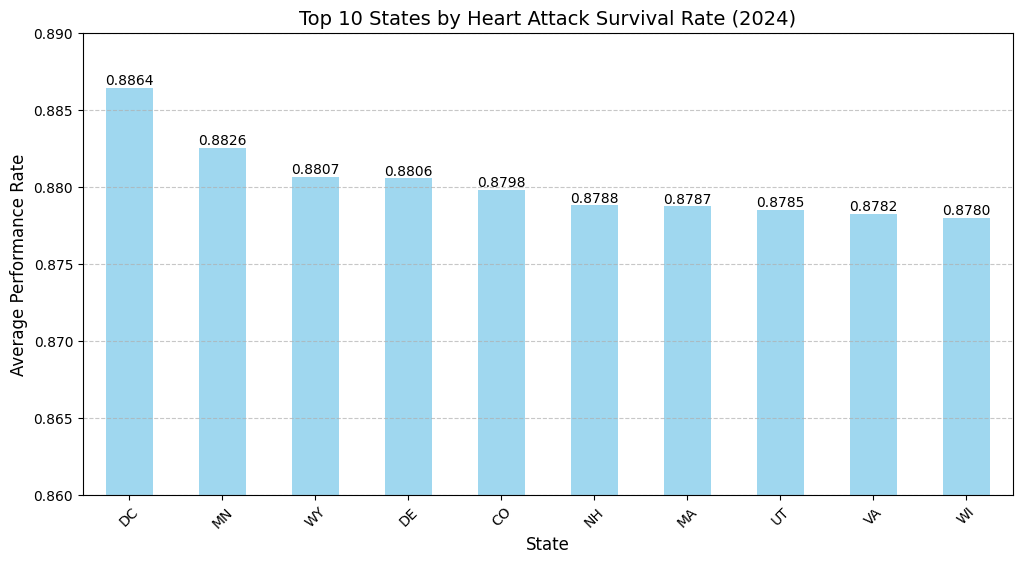

In [25]:
# Step 7 Visualization: Bar Chart
plt.figure(figsize=(12,6))
ax = df_grouped.head(10).plot(kind='bar', color='skyblue', alpha=0.8)

plt.title("Top 10 States by Heart Attack Survival Rate (2024)", fontsize=14)
plt.ylabel("Average Performance Rate", fontsize=12)
plt.xlabel("State", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.7)

# 🔹 Adjust Y-axis to make differences more visible
plt.ylim(0.86, 0.89)  # Zoom in on performance rate range

# 🔹 Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()



In [26]:
# Step 8: Compare Hospital Count by State
# Count Hospitals per State
df_counts = df['State'].value_counts()
print(df_counts.head(10))  # Top 10 states by hospital count


State
CA    151
TX    149
FL    129
IL     85
PA     80
NY     80
OH     72
GA     55
NC     53
NJ     53
Name: count, dtype: int64


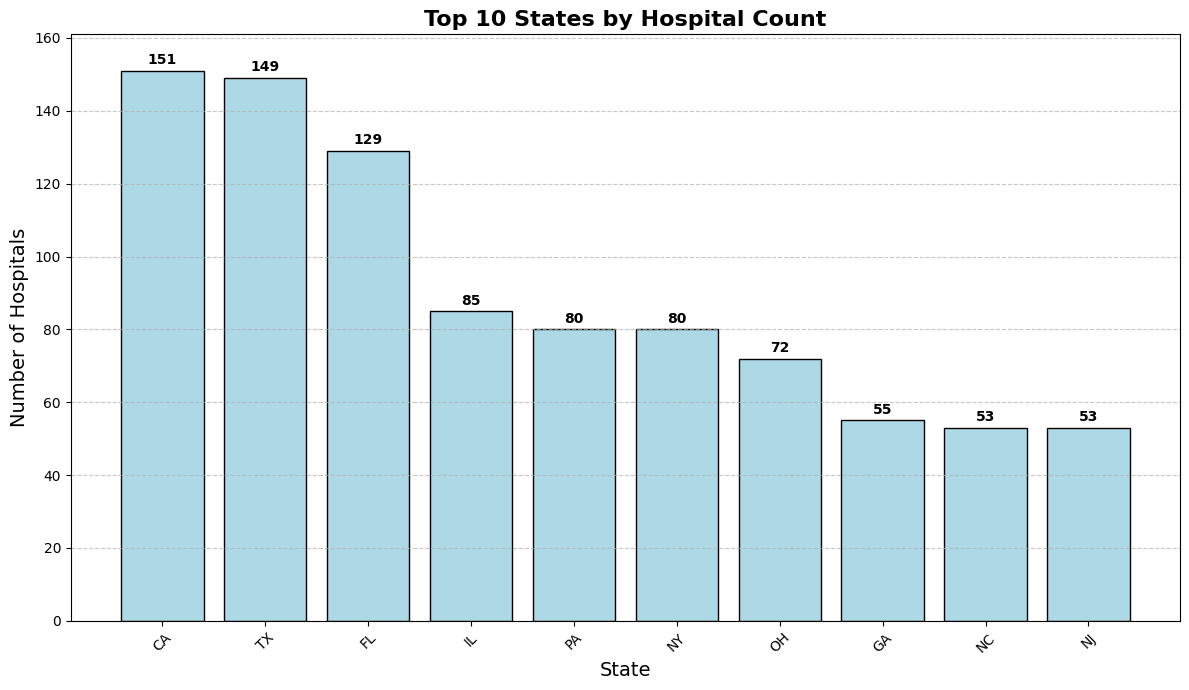

In [27]:
# Count Hospitals per State (Top 10)
df_counts = df['State'].value_counts().head(10)

# Plot Bar Chart
plt.figure(figsize=(12,7))
bars = plt.bar(df_counts.index, df_counts.values, color='lightblue', edgecolor='black')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize Plot
plt.title('Top 10 States by Hospital Count', fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Hospitals', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, df_counts.max() + 10)  # Add some space above bars
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show Plot
plt.show()


State
CA    151
TX    149
FL    129
IL     85
PA     80
NY     80
OH     72
GA     55
NC     53
NJ     53
MI     52
VA     52
IN     48
MO     45
MA     39
WA     36
WI     36
AZ     36
TN     34
KY     30
LA     30
CO     30
AL     27
SC     26
OK     24
AR     24
MS     22
OR     22
KS     21
IA     21
CT     19
MN     18
NV     18
NE     16
WV     15
UT     12
NH     11
NM     10
ME     10
MT      9
ID      8
HI      7
RI      6
ND      6
SD      5
AK      5
DE      5
VT      4
DC      4
WY      3
Name: count, dtype: int64
    State State Size
0      AL      Small
52     AK      Small
59     AZ      Small
107    AR      Small
137    CA      Large
387    CO      Small
427    CT      Small
452    DE      Small
457    DC      Small
463    FL      Large
State Size
Large    0.875224
Small    0.872883
Name: MORT-30-AMI Performance Rate, dtype: float64


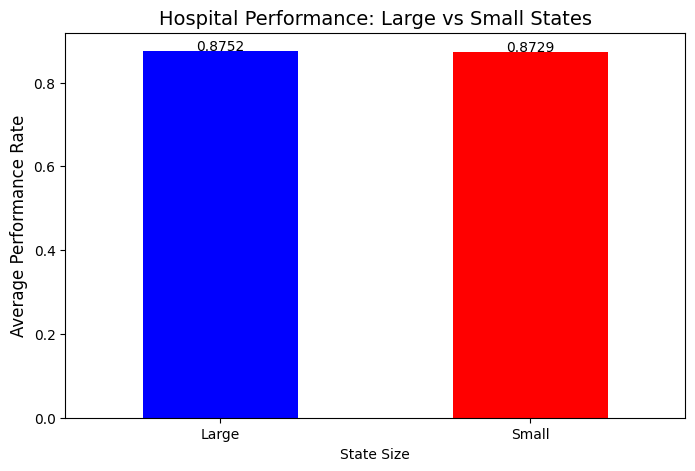

In [28]:
# Step 10: Large vs. Small State Comparison
# Large State: More than 50 hospitals
# Small State: 50 hospitals or fewer
df['State Size'] = df['State'].apply(lambda x: 'Large' if df['State'].value_counts()[x] > 50 else 'Small')

df_counts = df['State'].value_counts()
print(df_counts)

# Create a dictionary of hospital counts per state
state_size_map = df_counts.apply(lambda x: 'Large' if x > 50 else 'Small').to_dict()

# Map the dictionary to create a new column in the dataframe
df['State Size'] = df['State'].map(state_size_map)

# Verify if the classification worked
print(df[['State', 'State Size']].drop_duplicates().head(10))


df_grouped = df.groupby('State Size')['MORT-30-AMI Performance Rate'].mean()
print(df_grouped)

# 📊 Bar Chart: Large vs Small States
plt.figure(figsize=(8,5))
df_grouped.plot(kind='bar', color=['blue', 'red'])

plt.title("Hospital Performance: Large vs Small States", fontsize=14)
plt.ylabel("Average Performance Rate", fontsize=12)
plt.xticks(rotation=0)

# 🔹 Add Value Labels on Bars
for i, v in enumerate(df_grouped):
    plt.text(i, v + 0.001, f"{v:.4f}", ha='center', fontsize=10)

plt.show()

